<a href="https://colab.research.google.com/github/ellynnhitran/Facial-Expression-Recognition/blob/master/Emotion_Recognition_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [7]:
!ls drive

'My Drive'


In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [0]:
!pip install -q keras

In [12]:
import keras

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [0]:
data = pd.read_csv('/content/drive/My Drive/Projects/emotion recognition /dataset/fer2013.csv')

width, height = 48, 48

datapoints = data['pixels'].tolist()

In [0]:
#getting features for training
X = []
for xseq in datapoints:
    xx = [int(xp) for xp in xseq.split(' ')]
    xx = np.asarray(xx).reshape(width, height)
    X.append(xx.astype('float32'))

In [0]:
X = np.asarray(X)
X = np.expand_dims(X, -1)

#getting labels for training
y = pd.get_dummies(data['emotion']).as_matrix()

In [17]:
#storing them using numpy
np.save('fdataX', X)
np.save('flabels', y)

print("Preprocessing Done")
print("Number of Features: "+str(len(X[0])))
print("Number of Labels: "+ str(len(y[0])))
print("Number of examples in dataset:"+str(len(X)))
print("X,y stored in fdataX.npy and flabels.npy respectively")

Preprocessing Done
Number of Features: 48
Number of Labels: 7
Number of examples in dataset:35887
X,y stored in fdataX.npy and flabels.npy respectively


In [0]:
import sys, os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [0]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 10
width, height = 48, 48

In [0]:
x = np.load('./fdataX.npy')
y = np.load('./flabels.npy')

x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)

In [0]:
import matplotlib.pyplot as plt

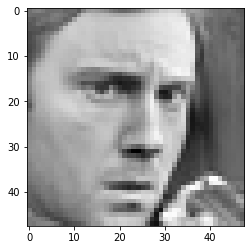

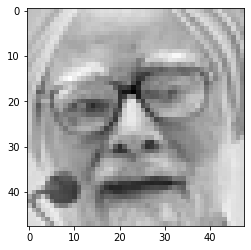

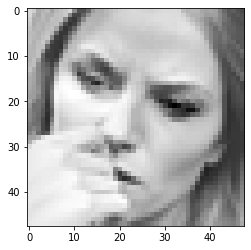

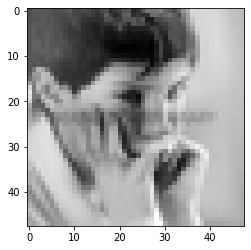

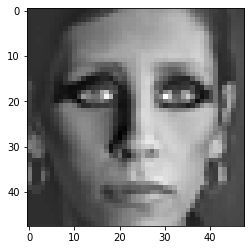

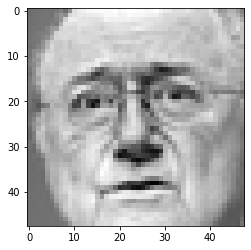

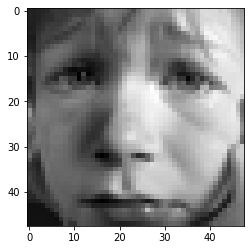

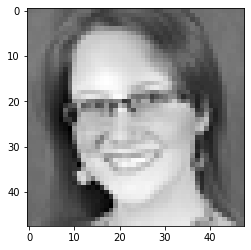

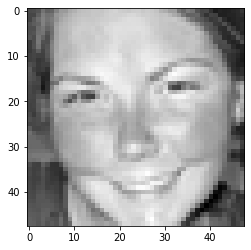

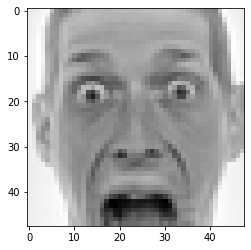

In [33]:
for xx in range(10):
 plt.figure(xx)
 plt.imshow(x[xx].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [0]:
#splitting into training, validation and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=41)


In [0]:
#saving the test samples to be used later
np.save('modXtest', X_test)
np.save('modytest', y_test)

In [0]:
#desinging the CNN
model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

In [0]:
#Compliling the model with adam optimixer and categorical crossentropy loss
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [38]:
#training the model
model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_valid), np.array(y_valid)),
          shuffle=True)

#saving the  model to be used later
fer_json = model.to_json()
with open("/content/drive/My Drive/Projects/emotion recognition /model/facial_expression_model_structure.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("/content/drive/My Drive/Projects/emotion recognition /model/facial_expression_model_weights.h5")
print("Saved model to disk")

Epoch 1/10
455/455 [==============================] - 1852s 4s/step - loss: 1.8981 - accuracy: 0.2269 - val_loss: 1.8191 - val_accuracy: 0.2594
Epoch 2/10
455/455 [==============================] - 1816s 4s/step - loss: 1.8156 - accuracy: 0.2514 - val_loss: 1.7236 - val_accuracy: 0.2963
Epoch 3/10
455/455 [==============================] - 1809s 4s/step - loss: 1.7442 - accuracy: 0.2895 - val_loss: 1.6454 - val_accuracy: 0.3461
Epoch 4/10
455/455 [==============================] - 1794s 4s/step - loss: 1.6339 - accuracy: 0.3477 - val_loss: 1.4831 - val_accuracy: 0.4037
Epoch 5/10
455/455 [==============================] - 1799s 4s/step - loss: 1.5302 - accuracy: 0.3874 - val_loss: 1.4176 - val_accuracy: 0.4223
Epoch 6/10
455/455 [==============================] - 1793s 4s/step - loss: 1.4599 - accuracy: 0.4200 - val_loss: 1.3516 - val_accuracy: 0.4573
Epoch 7/10
455/455 [==============================] - 1795s 4s/step - loss: 1.4122 - accuracy: 0.4481 - val_loss: 1.3484 - val_accuracy:

In [41]:
score = model.evaluate(X_valid, y_valid)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

101/101 [==============================] - 44s 440ms/step - loss: 1.1956 - accuracy: 0.5449
Test loss: 1.1955571174621582
Test accuracy: 54.48916554450989


In [0]:
def emotion_analysis(emotions):
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  y_pos = np.arange(len(objects))
  
  plt.bar(y_pos, emotions, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('percentage')
  plt.title('emotion')
  
  plt.show()

In [0]:
monitor_testset_results = False

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

In [0]:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

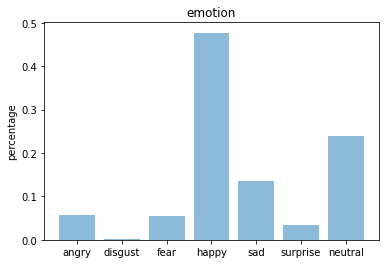

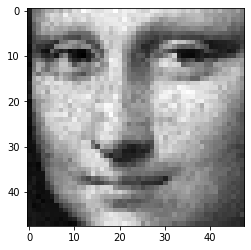

In [47]:
#make prediction for custom image out of test set

img = image.load_img("/content/drive/My Drive/Projects/emotion recognition /dataset/monalisa.png", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

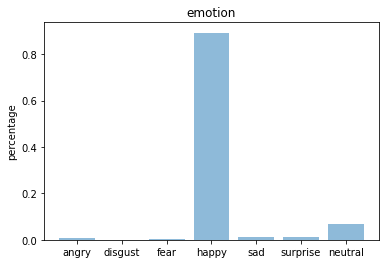

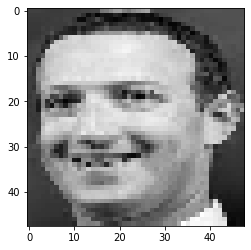

In [48]:
#make prediction for custom image out of test set

img = image.load_img("/content/drive/My Drive/Projects/emotion recognition /dataset/mark zukerberg test.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()